---   
 <img align="left" width="65" height="65"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Sentiment Analysis (Negative/Positive)</h1>
<h1 align="center">Movie Reviews (Binary Classification)</h1>

---
<h3><div align="right">Presentor: Summan Bahadur</div></h3>
<h3><div align="right">Roll Number: MSDSF21M509</div></h3>    


## What is Sentiment Analysis
Sentiment analysis is a natural language processing technique that identifies the polarity of a given text. There are different flavors of sentiment analysis, but one of the most widely used techniques labels data into positive, negative and neutral.

### Task : 
Perform Binary Classification on Movie Reviews 
https://www.rottentomatoes.com/m/captain_marvel/reviews?type=user

<img align="right" width="400" src="images/sentimentanalysis.png"  >

## Agenda of this notebook
1. **Corpus Generation**
    - Loading annotated data
    - Data Preprocessing
    - Data Transformation
2. **Feature Extraction**
    - Unigram
    - Bigram
    - Trigram
    - TF-IDF
3. **Model Fitting**
    - Naive Bayes
    - SVM
4. **Information Reterieval**
    - Word Cloud
    - Keyword Extraction

In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
#import spacy
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import datapath
#preprocessing data
import re
import nltk

from sklearn.metrics import confusion_matrix, accuracy_score

### Load dataset




In [61]:
dataset = pd.read_excel("./reviews_annotated.xlsx", sheet_name="reviews_annotated")

<img align="center"   src="images/original_reviews.png"  >

In [62]:
dataset = dataset[['review','final_sentiment']]
dataset = dataset[dataset['final_sentiment'] != 'neutral']
dataset.dropna(inplace=True)
print(dataset.shape)
dataset.head(30)

(196, 2)


,review,final_sentiment
0,"A totally awesome MCU entry, clever, hilarious, surprising, with some great origin stories of important characters and it makes you look at yourself and question your assumptions and default biases. I donâ€™t understand the low scores, sounds like something besides the movie/plot is driving them. See this movie, itâ€™s incredible.",positive
1,Wooow this is a baaad movie. Worst lead character in the entire Marvel Universe!,negative
2,"Unmemorable movie, there's a little of Top Gun, Green Lantern (that said it all) and worst of all a little of Marvel magic. The protagonist is mono-dimensional and we know how cool, good, fun she is by what other character say about her. She never acts cool, fun or anything else... a big shame!",negative
3,"Aside from the most woodenactor in the world, the cgi is laughable at times",negative
4,Brie Larson put too much of her own obtuse personality into the film,negative
5,"Yes, I know the anti Cpt Marvel diatribe, but as an original Marvel Comics fan, i found it enjoyable. A bit too much of today's commentary on society but, all in all, an enjoyable film.",positive
6,"A movie just as good as the other origin stories for characters in the MCU, Brie delivers a good and solid Carol Denvers, with her military mannerisms and her background as a strong woman. I would particularly do it differently about the way she gain her powers, but it's ok, this is a universe where Bruce Banner shoots himself with gama radiation; the hole Kree nuclea very good, love Jude Law, love Gemma Chan. I don't like the way they led Nick Fury's core, I was expecting more of the serious Samuel L. Jackson from the first phase, but it's nothing that destroyed the movie.",positive
7,Wow I tried watching it expecting it to be rough but I didn't expect it to be THAT bad LOL,negative
8,"The plot is weak. Not a huge fan of this movie. I really wanted to like it but Marvel flopped their first attempt. And that's okay! Please Marvel, give us a GOOD movie next time.",negative
9,"Not the worst MCU movie but it wasn't anywhere close to being a fun, enjoyable Marvel movie. The plot moved slowly and it was predictable. Brie Larson's acting and the writing of her character ended up making a boring dislikable character with little to no character development. On the other hand, Samuel L Jackson as Nick Fury once again on screen carried the show as a side character; he made the movie somewhat better than it was. I hated one of the scenes with Nick Fury and a cat... not going to spoil the movie but come on they could have done a lot better. One of the reasons this movie didn't work is because it was trying to be too many things at once, and it couldn't stick the landing.",negative


In [63]:
dataset=dataset.reset_index(drop=True)


In [64]:
dataset['final_sentiment'] = pd.factorize(dataset['final_sentiment'])[0]
dataset

,review,final_sentiment
0,"A totally awesome MCU entry, clever, hilarious, surprising, with some great origin stories of important characters and it makes you look at yourself and question your assumptions and default biases. I donâ€™t understand the low scores, sounds like something besides the movie/plot is driving them. See this movie, itâ€™s incredible.",0
1,Wooow this is a baaad movie. Worst lead character in the entire Marvel Universe!,1
2,"Unmemorable movie, there's a little of Top Gun, Green Lantern (that said it all) and worst of all a little of Marvel magic. The protagonist is mono-dimensional and we know how cool, good, fun she is by what other character say about her. She never acts cool, fun or anything else... a big shame!",1
3,"Aside from the most woodenactor in the world, the cgi is laughable at times",1
4,Brie Larson put too much of her own obtuse personality into the film,1
...,...,...
191,"Below-par for the MCU. Powerful women in cinema have rocked for decades, and don't need to be so obvious.",1
192,As a huge fan of Captain Marvel from her Ms. Marvel days I loved this MCU adaptation. Brie Larson did a great job getting her personality down. Can't wait to see more of her in the MCU.,0
193,"I've never seen someone with less charisma on screen than Brie Larson, whose acting was so hollow in this film. The character is never developed into someone you even care about and the story just isn't very interesting. I love Samuel Jackson and even he couldn't save this film. This is the worse Marvel movie I have seen so far.",1
194,such a good flick. she is so strong. cant wait to watch this character grow,0


<AxesSubplot:xlabel='final_sentiment', ylabel='count'>

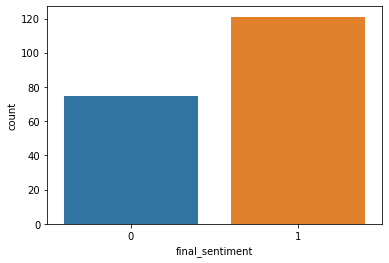

In [65]:
#analysis of data
import seaborn as sns
sns.countplot(x='final_sentiment', data=dataset)


### Data Preprocessing / Cleaning

<img align="center"   src="images/dropping_special_characters.png"  >

<img align="center"   src="images/converting_to_small.png"  >

In [66]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

def generate_corpus():
    corpus=[]
    for i in range(0, 196):
        review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

[nltk_data] Downloading package stopwords to C:\Users\Summan
[nltk_data]     Bahadur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
generate_corpus()

['total awesom mcu entri clever hilari surpris great origin stori import charact make look question assumpt default bias understand low score sound like someth besid movi plot drive see movi incred',
 'wooow baaad movi worst lead charact entir marvel univers',
 'unmemor movi littl top gun green lantern said worst littl marvel magic protagonist mono dimension know cool good fun charact say never act cool fun anyth els big shame',
 'asid woodenactor world cgi laughabl time',
 'brie larson put much obtus person film',
 'ye know anti cpt marvel diatrib origin marvel comic fan found enjoy bit much today commentari societi enjoy film',
 'movi good origin stori charact mcu brie deliv good solid carol denver militari manner background strong woman would particularli differ way gain power ok univers bruce banner shoot gama radiat hole kree nuclea good love jude law love gemma chan like way led nick furi core expect seriou samuel l jackson first phase noth destroy movi',
 'wow tri watch expect r

### Data transformation

<img align="center"   src="images/dropping_stop_words.png"  >


<img align="center"   src="images/bag_of_words.png"  >

# Bag of Words

**Computer can still not understand the corpus and hence we need to convert it into numbers i.e. convert it into Bag of Words**
 
 - System will uniquely identify all unique words , tokens and will create saperate columns for each of the token
 - It is also called Feature extraction where each word is used as a feature for training the classifier
 - Bag of words representation discards information on order and sequencing of words
 - Dropping tokens (unique words) that only reflect in only a few reviews, reduces sparsity

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000) # with 1420 - accuracy was 0.6

In [69]:
corpus = generate_corpus()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [70]:
print("Vocabulary: ", cv.vocabulary_)

Vocabulary:  {'total': 891, 'awesom': 66, 'mcu': 530, 'entri': 298, 'clever': 166, 'hilari': 421, 'surpris': 845, 'great': 404, 'origin': 606, 'stori': 819, 'import': 437, 'charact': 154, 'make': 516, 'look': 503, 'question': 668, 'assumpt': 57, 'default': 225, 'bias': 95, 'understand': 911, 'low': 507, 'score': 734, 'sound': 791, 'like': 493, 'someth': 786, 'besid': 91, 'movi': 559, 'plot': 636, 'drive': 265, 'see': 739, 'incred': 441, 'wooow': 975, 'baaad': 70, 'worst': 979, 'lead': 481, 'entir': 296, 'marvel': 524, 'univers': 918, 'unmemor': 920, 'littl': 499, 'top': 889, 'gun': 410, 'green': 406, 'lantern': 471, 'said': 722, 'magic': 512, 'protagonist': 663, 'mono': 556, 'dimension': 244, 'know': 464, 'cool': 194, 'good': 399, 'fun': 374, 'say': 727, 'never': 572, 'act': 5, 'anyth': 42, 'els': 281, 'big': 96, 'shame': 754, 'asid': 55, 'woodenactor': 974, 'world': 977, 'cgi': 150, 'laughabl': 477, 'time': 878, 'brie': 120, 'larson': 474, 'put': 666, 'much': 561, 'obtus': 589, 'perso

In [71]:
# Save the bag of words for further prediction
import pickle

bow_path = "./bow.pkl"
pickle.dump(cv , open(bow_path,"wb"))

## Model Fitting

<img align="right" width="400" src="images/naive_bayes.jpg"  >

## Naive Bayes

   - Naive Bayes predicts Tag of a word
   - It calculates the probability of each tag for a given text and then output the tag with the highest one


In [72]:

# Dividing dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [73]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Model performance

In [74]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[10  7]
 [ 9 14]]


0.6

In [75]:

test_corpus=["I really enjoyed the movie","wors script ","horribl film ever","loved it"]

corpus=[]
for t in  test_corpus:
    test_review = re.sub('[^a-zA-Z]', ' ', t)
    test_review = test_review.lower()
    test_review = test_review.split()
    test_review = [ps.stem(word) for word in test_review if not word in set(all_stopwords)]
    test_review = ' '.join(test_review)
    corpus.append(test_review)

print("Prediction with preprosessing the testing data")
corpus =cv.transform(corpus).toarray()
y = classifier.predict(corpus)
print(y)


Prediction with preprosessing the testing data
[0 1 1 0]


------

# Unigram - Naive Bayes

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(1,1))

In [77]:
corpus = generate_corpus()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [78]:
df_output = pd.DataFrame(data = X, columns = cv.get_feature_names())
df_output.T.tail(5)

C:\Users\Summan Bahadur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
yesterday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
yet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
younger,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [80]:

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [81]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  7]
 [ 9 14]]


0.6


# Unigram - SVM

<img align="center" width="400" src="images/svm.png"  >


In [82]:
cv = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(1,1))

In [83]:
corpus = generate_corpus()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [84]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [85]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [86]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  2]
 [ 4 19]]


0.85

# BIGRAM - Naive Bayes

In [87]:

cv = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(2,2))

In [88]:
corpus = generate_corpus()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [89]:
df_output = pd.DataFrame(data = X, columns = cv.get_feature_names())

pd.set_option("display.max_colwidth", None)
df_output.T.tail(5)

C:\Users\Summan Bahadur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
yesterday terribl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yet settl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young nick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
younger version,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youth get,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[15  2]
 [12 11]]


0.65

# Bigram - SVM

In [91]:
cv = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(2,2))

In [92]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [93]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 3 14]
 [ 5 18]]


0.525

# Trigram - Naive Bayes


In [94]:
cv = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(3,3))
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [95]:
df_output = pd.DataFrame(data = X, columns = cv.get_feature_names())
df_output.T.tail(5)

C:\Users\Summan Bahadur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
yet settl role,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
young nick furri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
younger version captain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
younger version furi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youth get know,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[16  1]
 [18  5]]


0.525

In [97]:
print ("Macro:",precision_recall_fscore_support(y_test,y_pred, average='macro'))

Macro: (0.6519607843137255, 0.5792838874680307, 0.48613928329952677, None)


# Trigram - SVM

In [98]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 0 17]
 [ 0 23]]


0.575

# Summary

<img align="center" width="400" src="images/summary_ngram.png"  >

------

# TF-IDF

**In a simple bag of words, every word is given equal importance. The idea behind TF-IDF is that the words that occur more frequently in one document and less frequently in other documents should be given more importance as they are more useful for classification**

   - TF-IDF is a method of Text Vectorization for words in a document
   - It is a measure , used in the fields of Information retrieval and machine learning that can quantify the importance or relevance of string representation in a document amongst a collection of documents/corpus
   - TF stands for Term Frequency, which represents the probability of occurrence of the word in a document.
   - IDF gives us a measure of the importance of the word across the corpus (or the dataset). In other words, the words which occur rarely across different documents of the corpus are given higher importance.

In [99]:
tv = TfidfVectorizer(
                    ngram_range = (1,3), #(1,3)
                    sublinear_tf = True,
                    max_features = 4000)
corpus = generate_corpus()

X = tv.fit_transform(corpus)

y = dataset.iloc[:, -1].values

vocab = tv.get_feature_names()
print(vocab[:5])

['abil', 'abl', 'absolut', 'absolut noth', 'across']


C:\Users\Summan Bahadur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
print("Vocabulary length:", len(vocab))

Vocabulary length: 4000


In [101]:
dist = np.sum(X, axis=0)
c = pd.DataFrame(dist,columns = vocab)

In [102]:
c

,abil,abl,absolut,absolut noth,across,act,act like,action,action scene,action sequenc,...,yet settl,yet settl role,young,young nick,young nick furri,younger,younger version,younger version captain,younger version furi,youth
0,0.12915,0.323778,1.489696,0.34754,0.500681,2.330142,0.473377,1.15125,0.253,0.237911,...,0.141242,0.141242,0.166683,0.166683,0.166683,0.187397,0.187397,0.114714,0.087339,0.141422


## Word Cloud

In [103]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [104]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

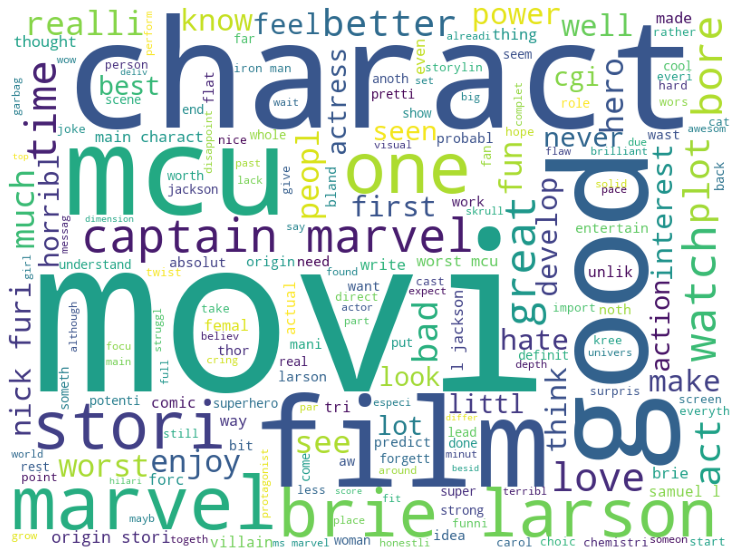

In [105]:
cloud(' '.join(corpus))

## Information Reterival

**Extracting Keywords Using TF-IDF**

In [106]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [107]:
def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,10) #TOP_K_KEYWORDS)
    
    return list(keywords.keys())

In [108]:
#load a set of stop words
#stopwords=get_stopwords_list(STOPWORD_PATH)

# Initializing TF-IDF Vectorizer with stopwords
vectorizer = TfidfVectorizer(stop_words=all_stopwords, smooth_idf=True, use_idf=True)

# Creating vocab with our corpora
# Exlcluding first 10 docs for testing purpose
vectorizer.fit_transform(corpus[10::])

# Storing vocab
feature_names = vectorizer.get_feature_names()

C:\Users\Summan Bahadur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [109]:
result = []
for doc in corpus[0:10]:
    df = {}
    df['full_text'] = doc
    df['top_keywords'] = get_keywords(vectorizer, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)
final

,full_text,top_keywords
0,total awesom mcu entri clever hilari surpris great origin stori import charact make look question assumpt default bias understand low score sound like someth besid movi plot drive see movi incred,"[total, low, clever, score, hilari, besid, awesom, surpris, import, understand]"
1,wooow baaad movi worst lead charact entir marvel univers,"[entir, univers, lead, worst, charact, marvel, movi]"
2,unmemor movi littl top gun green lantern said worst littl marvel magic protagonist mono dimension know cool good fun charact say never act cool fun anyth els big shame,"[cool, littl, fun, shame, top, dimension, say, protagonist, big, anyth]"
3,asid woodenactor world cgi laughabl time,"[world, cgi, time]"
4,brie larson put much obtus person film,"[person, put, much, film, brie, larson]"
5,ye know anti cpt marvel diatrib origin marvel comic fan found enjoy bit much today commentari societi enjoy film,"[enjoy, cpt, found, fan, comic, bit, marvel, know, origin, much]"
6,movi good origin stori charact mcu brie deliv good solid carol denver militari manner background strong woman would particularli differ way gain power ok univers bruce banner shoot gama radiat hole kree nuclea good love jude law love gemma chan like way led nick furi core expect seriou samuel l jackson first phase noth destroy movi,"[way, good, love, seriou, phase, ok, law, gain, expect, background]"
7,wow tri watch expect rough expect bad lol,"[expect, rough, lol, wow, tri, bad, watch]"
8,plot weak not huge fan movi realli want like marvel flop first attempt okay pleas marvel give us good movi next time,"[weak, pleas, next, huge, attempt, us, fan, give, want, marvel]"
9,not worst mcu movi anywher close fun enjoy marvel movi plot move slowli predict brie larson act write charact end make bore dislik charact littl charact develop hand samuel l jackson nick furi screen carri show side charact made movi somewhat better hate one scene nick furi cat not go spoil movi come could done lot better one reason movi work tri mani thing stick land,"[charact, movi, nick, furi, better, side, move, carri, not, one]"


# Model Fitting

### TF-IDF - Random Forest

In [110]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 0 17]
 [ 0 23]]


0.575

### TF-IDF -Naive Bayes

In [111]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[16  1]
 [18  5]]


0.525

### TF-IDF - SVM

In [112]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 0 17]
 [ 0 23]]


0.575

# Summary

 - TF-IDF cannot help carry semantic meaning. It considers the importance of the words due to how it weighs them, but it cannot necessarily derive the contexts of the words and understand importance that way.

 - TF-IDF can be used for extracting information about what people are mostly talking about

----


# Word To Vector

**A key differences between TF-IDF and word2vec is that TF-IDF is a statistical measure that we can apply to terms in a document and then use that to form a vector whereas word2vec will produce a vector for a term and then more work may need to be done to convert that set of vectors into a singular vector or other format. Additionally TF-IDF does not take into consideration the context of the words in the corpus whereas word2vec does.**